# Perfect models: Random Forest Classifier part 1
## Określenie głębokości drzewa przez wizualizację

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

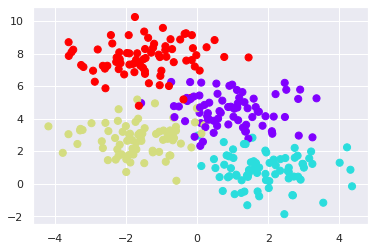

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [12]:
print('X :',X.shape)
print('y :',y.shape)

X : (300, 2)
y : (300,)


In [13]:
y

array([1, 3, 0, 3, 1, 1, 2, 0, 3, 3, 2, 3, 0, 3, 1, 0, 0, 1, 2, 2, 1, 1,
       0, 2, 2, 0, 1, 0, 2, 0, 3, 3, 0, 3, 3, 3, 3, 3, 2, 1, 0, 2, 0, 0,
       2, 2, 3, 2, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 3, 1, 3, 0, 3, 2, 2, 2,
       3, 1, 3, 2, 0, 2, 3, 2, 2, 3, 2, 0, 1, 3, 1, 0, 1, 1, 3, 0, 1, 0,
       3, 3, 0, 1, 3, 2, 2, 0, 1, 1, 0, 2, 3, 1, 3, 1, 0, 1, 1, 0, 3, 0,
       2, 2, 1, 3, 1, 0, 3, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2,
       2, 1, 3, 2, 2, 3, 0, 3, 3, 2, 0, 2, 0, 2, 3, 0, 3, 3, 3, 0, 3, 0,
       1, 2, 3, 2, 1, 0, 3, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 3, 1, 0, 2, 3,
       1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 2, 2, 2, 0,
       2, 3, 0, 2, 1, 2, 0, 3, 2, 3, 0, 3, 0, 2, 0, 0, 3, 2, 2, 1, 1, 0,
       3, 1, 1, 2, 1, 2, 0, 3, 3, 0, 0, 3, 0, 1, 2, 0, 1, 2, 3, 2, 1, 0,
       1, 3, 3, 3, 3, 2, 2, 3, 0, 2, 1, 0, 2, 2, 2, 1, 1, 3, 0, 0, 2, 1,
       3, 2, 0, 3, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 3, 3, 1, 1, 0, 1, 1, 1,
       3, 2, 3, 0, 1, 1, 3, 3, 3, 1, 1, 0, 3, 2])

In [14]:
X

array([[ 2.45830537e-02,  2.96215652e+00],
       [-1.52392631e+00,  7.12573205e+00],
       [ 1.27450825e+00,  5.63017322e+00],
       [-8.65523345e-01,  7.80121774e+00],
       [ 7.48740670e-01,  2.55579434e+00],
       [ 4.35918422e+00, -1.62352163e-01],
       [-1.99576820e+00,  7.16440976e-01],
       [ 1.70536064e+00,  4.43277024e+00],
       [ 4.90616903e-01,  8.82985441e+00],
       [-3.52995502e-01,  9.21042408e+00],
       [-1.83601846e+00,  2.68441560e+00],
       [-3.61784268e+00,  8.69951232e+00],
       [ 1.42013331e+00,  4.63746165e+00],
       [-2.88089030e+00,  6.26769229e+00],
       [ 1.05505217e+00, -6.47107437e-01],
       [ 1.05472929e-01,  3.72493766e+00],
       [ 1.13121750e+00,  4.68194985e+00],
       [ 2.91209813e+00,  2.46638067e-01],
       [-7.60240832e-01,  3.27417508e+00],
       [-7.79715679e-01,  1.72893731e+00],
       [ 3.15492712e+00,  1.55292739e+00],
       [ 1.59167155e+00,  1.37914513e+00],
       [ 5.73093132e-01,  5.52623240e+00],
       [-2.

### Abaliza jak Random Forest klasyfikuje w zależności od głębokości podziału

/home/wojciech/ATOS/helpers_05_08.py:34: UserWarning: The following kwargs were not used by contour: 'clim'
  zorder=1)
/home/wojciech/ATOS/helpers_05_08.py:34: UserWarning: The following kwargs were not used by contour: 'clim'
  zorder=1)
/home/wojciech/ATOS/helpers_05_08.py:34: UserWarning: The following kwargs were not used by contour: 'clim'
  zorder=1)
/home/wojciech/ATOS/helpers_05_08.py:34: UserWarning: The following kwargs were not used by contour: 'clim'
  zorder=1)


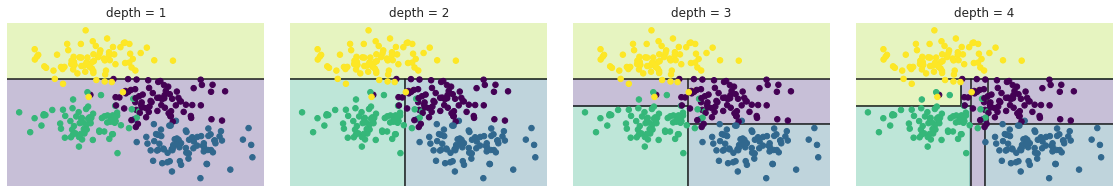

In [3]:
from helpers_05_08 import visualize_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs

        
fig, ax = plt.subplots(1, 4, figsize=(16, 3))
fig.subplots_adjust(left=0.02, right=0.98, wspace=0.1)

#X, y = make_blobs(n_samples=300, centers=4,
#                  random_state=0, cluster_std=1.0)

for axi, depth in zip(ax, range(1,5)):
    model = DecisionTreeClassifier(max_depth=depth)
    visualize_tree(model, X, y, ax=axi)
    axi.set_title('depth = {0}'.format(depth))



In [4]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

/home/wojciech/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'clim'


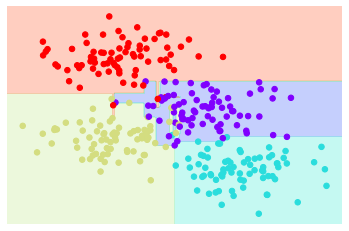

In [5]:
visualize_classifier(DecisionTreeClassifier(), X, y)

In [6]:
import helpers_05_08
helpers_05_08.plot_tree_interactive(X, y)

interactive(children=(Dropdown(description='depth', index=1, options=(1, 5), value=5), Output()), _dom_classes…

<function helpers_05_08.plot_tree_interactive.<locals>.interactive_tree(depth=5)>

/home/wojciech/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'clim'


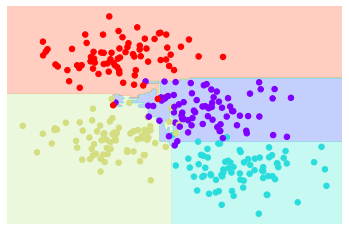

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

bag.fit(X, y)
visualize_classifier(bag, X, y)

Uruchamiamy las 240 drzew

/home/wojciech/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'clim'


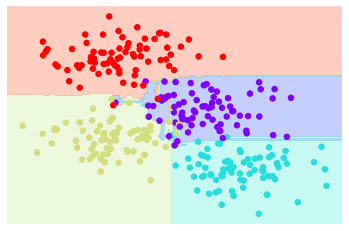

In [9]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=240, random_state=0)
visualize_classifier(model, X, y);